In [1]:
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use(['seaborn-muted', 'dark_background'])
plt.style.use(['seaborn-muted'])
%matplotlib inline

# other
from datetime import datetime, timedelta

# Model Evaluation

In [2]:
df = pd.read_pickle('../data/model_preds.pkl')

for col in df.columns:
    df[col] = df[col].astype(int)
    
start_date = datetime(2019, 9, 20)
for i in range(1, 4):
    df['date{}'.format(i)] = start_date + df['day{}'.format(i)].apply(timedelta)
    df['error{}'.format(i)] = df['pred{}'.format(i)] - df['target{}'.format(i)]

In [3]:
df_players = pd.read_pickle('../data/fifa20_players.pkl')
df_players['resource_id'] = df_players.resource_id.astype(int)

df = df.merge(df_players[['resource_id', 'player_name', 'overall', 'position', 'club', 'league', 'nationality']], on=['resource_id'], how='left')

In [4]:
df.head(2)

,pred1,pred2,pred3,target1,target2,target3,day1,day2,day3,resource_id,...,date2,error2,date3,error3,player_name,overall,position,club,league,nationality
0,8971,9501,9426,5780,5771,5654,10,11,11,41236,...,2019-10-01,3730,2019-10-01,3772,Zlatan Ibrahimovic,85,ST,LA Galaxy,Major League Soccer,Sweden
1,9246,9771,9698,5771,5654,5914,11,11,13,41236,...,2019-10-01,4117,2019-10-03,3784,Zlatan Ibrahimovic,85,ST,LA Galaxy,Major League Soccer,Sweden


### General Visualizations

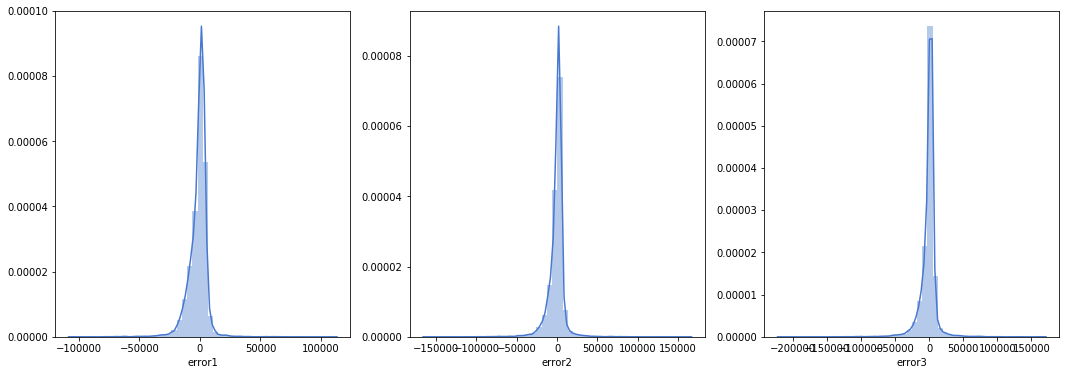

In [5]:
fig, axs = plt.subplots(1,3, figsize=(18,6))

for i, ax in enumerate(axs):
    sns.distplot(df['error{}'.format(i+1)], ax=ax)

### First error

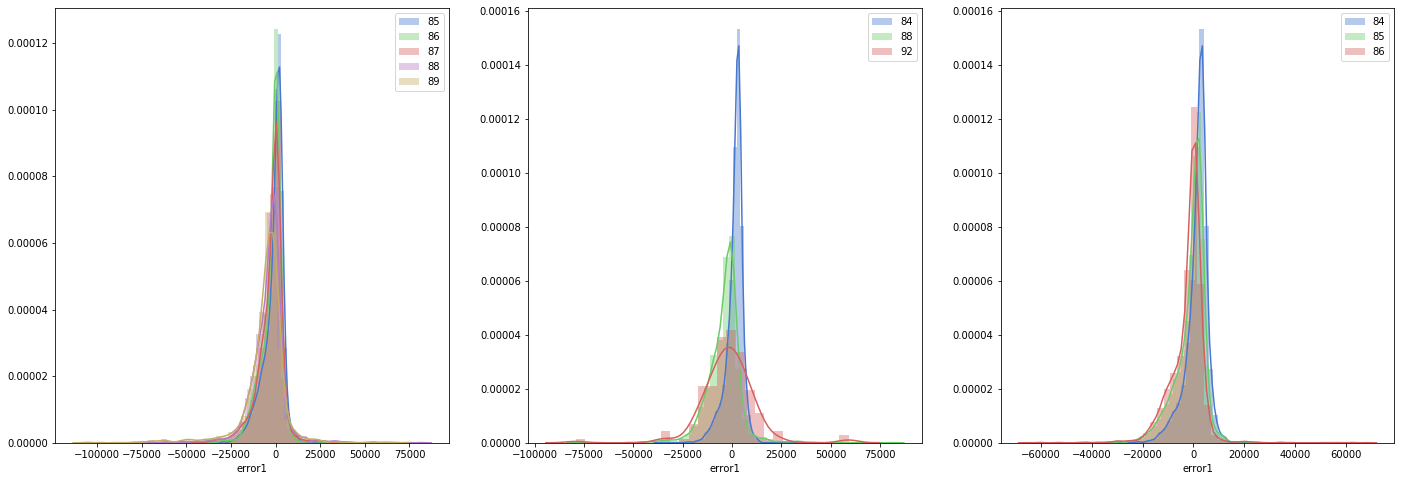

In [6]:
fig, axs = plt.subplots(1,3, figsize=(24, 8))

for ovr in np.arange(85, 90):
    df_ = df[df.overall==str(ovr)]
    
    sns.distplot(df_.error1, ax=axs[0], label=ovr)
    
for ovr in [84, 88, 92]:
    df_ = df[df.overall==str(ovr)]
    sns.distplot(df_.error1, ax=axs[1], label=ovr)
    
for ovr in [84, 85, 86]:
    df_ = df[df.overall==str(ovr)]
    sns.distplot(df_.error1, ax=axs[2], label=ovr)
    
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

In [7]:
df['abs_error1'] = abs(df.error1)

error1 = df.groupby('resource_id').agg({'abs_error1': ['mean', 'std']}).reset_index()

error1 = error1.merge(df_players, on='resource_id', how='left')

error1 = error1.merge(df.groupby('resource_id').target1.mean().reset_index().rename({'target1': 'price'}, axis=1), on='resource_id', how='left')

error1['mean_error'] = error1[error1.columns[2]]
error1['std_error'] = error1[error1.columns[3]]

error1 = error1[['resource_id', 'player_id', 'player_name', 'overall', 'position', 'club', 'nationality', 'league', 'price', 'mean_error', 'std_error']]

error1['scaled_mean_error'] = error1.mean_error / error1.price
error1['scaled_std_error'] = error1.std_error / error1.price

/home/costas/.virtualenvs/fut/lib/python3.8/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [8]:
error1.head(2)

,resource_id,player_id,player_name,overall,position,club,nationality,league,price,mean_error,std_error,scaled_mean_error,scaled_std_error
0,41236,4071,Zlatan Ibrahimovic,85,ST,LA Galaxy,Sweden,Major League Soccer,7894.59596,2929.646465,1347.952100,0.371095,0.170744
1,120533,24236,Pepe,84,CB,FC Porto,Portugal,Liga NOS,5206.50000,3653.394231,1026.280204,0.701699,0.197115


In [9]:
error1.sort_values(by='scaled_mean_error', ascending=True).head(40)

,resource_id,player_id,player_name,overall,position,club,nationality,league,price,mean_error,std_error,scaled_mean_error,scaled_std_error
133,50471368,44020,Vincent Kompany,85,CB,RSC Anderlecht,Belgium,Belgium Pro League,17752.428571,189.428571,118.073222,0.010671,0.006651
334,67312240,42999,Virgil van Dijk,90,CB,Liverpool,Holland,Premier League,553362.690141,9667.577465,7408.990623,0.017471,0.013389
139,50489129,43974,Raúl Albiol,85,CB,Villarreal CF,Spain,LaLiga Santander,18575.357143,351.428571,337.306004,0.018919,0.018159
245,50542948,43757,Anthony Martial,86,LW,Manchester United,France,Premier League,543095.425532,10815.191489,11648.069248,0.019914,0.021448
209,50531752,43037,Heung Min Son,87,CF,Tottenham Hotspur,Korea Republic,Premier League,442933.126761,9692.929577,6985.470104,0.021884,0.015771
195,50524633,42993,Kevin De Bruyne,91,CAM,Manchester City,Belgium,Premier League,242021.098592,5340.140845,4796.015016,0.022065,0.019817
254,50547562,43009,N'Golo Kanté,89,CDM,Chelsea,France,Premier League,329418.788732,7295.704225,5130.697211,0.022147,0.015575
390,84084790,42985,James Rodríguez,88,CAM,Real Madrid,Colombia,LaLiga Santander,266516.626667,6114.493333,5473.668577,0.022942,0.020538
236,50540370,43024,Sadio Mané,88,LW,Liverpool,Senegal,Premier League,306190.338028,7272.563380,7266.071219,0.023752,0.023731
462,151183489,43864,Robert Lewandowski,92,ST,FC Bayern München,Poland,Bundesliga,221272.038462,5260.615385,3226.553543,0.023774,0.014582


In [12]:
rids = [67312240, 50542948, 50531752, 50524633]

In [24]:
def plot_pred(rids, step=1):
    num_rids = len(rids)
    fig, axs = plt.subplots(1, num_rids, figsize=(6*num_rids, 6))
    for i, ax in enumerate(axs):
        rid = rids[i]
    
        player_name = df[df.resource_id==rid].player_name.values[0]
        player_ovr = df[df.resource_id==rid].overall.values[0]

        cols = ['pred{}'.format(step), 'target{}'.format(step), 'date{}'.format(step)]
        df_ = df[df.resource_id==rid][cols]

        ax.plot(df_[cols[2]], df_[cols[0]], label='Prediction')
        ax.plot(df_[cols[2]], df_[cols[1]], label='Actual price')

        ax.set_title(str(player_ovr) + ' ' +  player_name + '; Step: {}'.format(step))
        ax.tick_params(axis='x', rotation=45)

        ax.legend()
    plt.show()

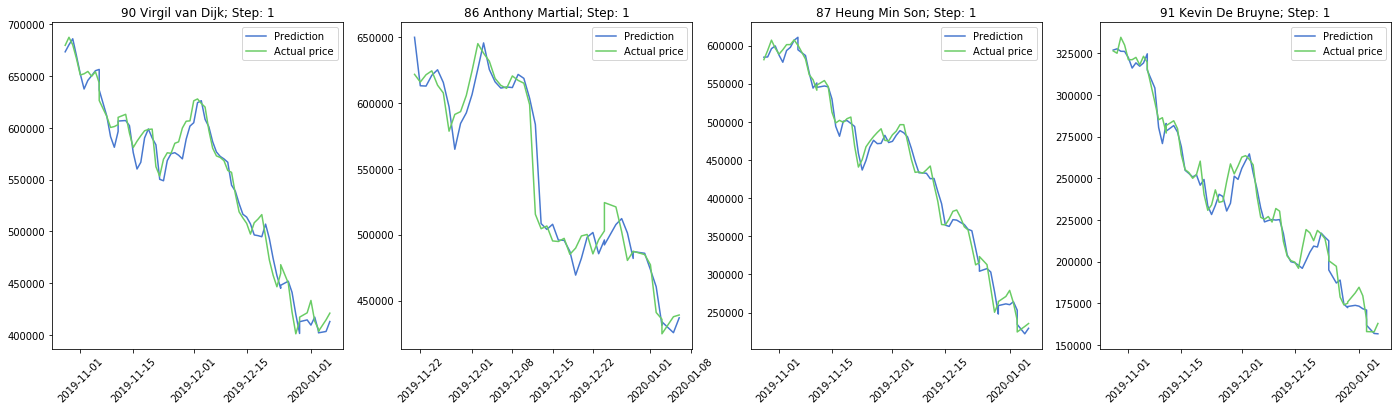

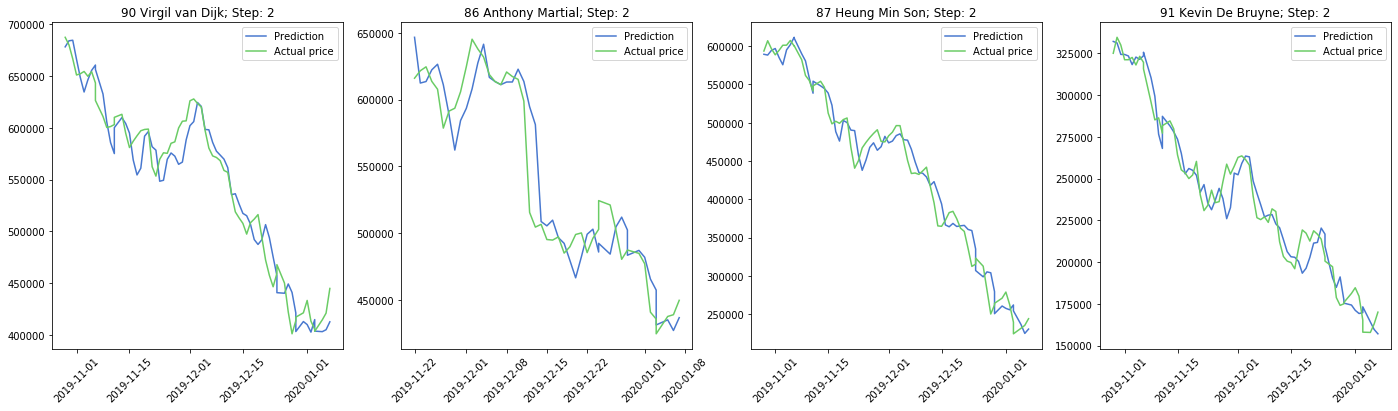

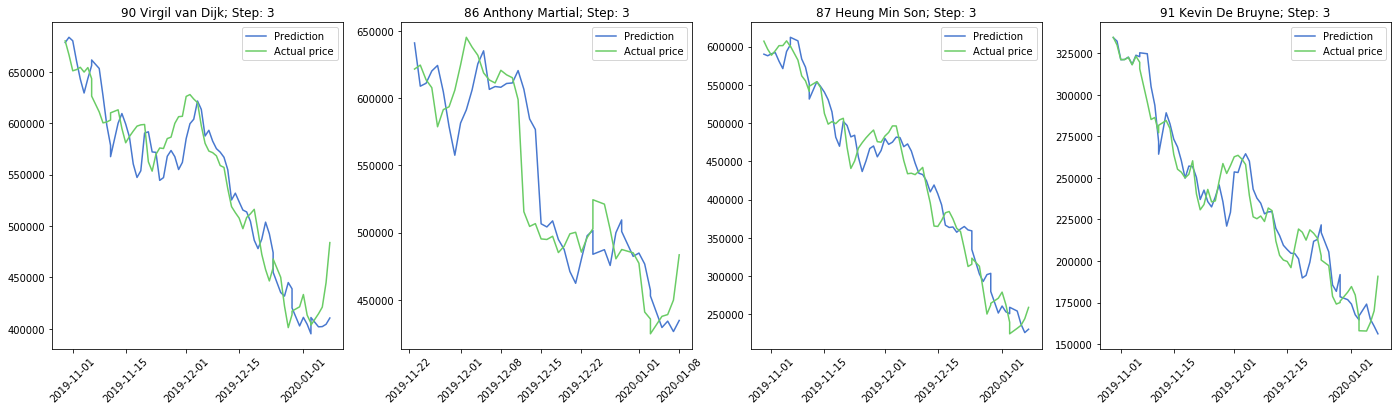

In [25]:
plot_pred(rids, step=1)
plot_pred(rids, step=2)
plot_pred(rids, step=3)